In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tunadromd-malware-detection-new/test.csv
/kaggle/input/tunadromd-malware-detection-new/data.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import joblib

In [3]:
data=pd.read_csv("/kaggle/input/tunadromd-malware-detection-new/data.csv")
test=pd.read_csv("/kaggle/input/tunadromd-malware-detection-new/test.csv")

In [4]:
data = data.drop(['ID'], axis=1)

In [5]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  \
0                    False                    False   
1                    False                    False   
2                    False                    False   
3                    False                    False   
4                    False                    False   
...                    ...                      ...   
4460                 False                    False   
4461                 False                    False   
4462                 False                    False   
4463                 False                    False   
4464                 False                    False   

      ACCESS_CHECKIN_PROPERTIES  ACCESS_COARSE_LOCATION  \
0                         False                   False   
1                         False                   False   
2                         False                   False   
3                         False          

In [6]:
data.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  \
0                    False                    False   
1                    False                    False   
2                    False                    False   
3                    False                    False   
4                    False                    False   
...                    ...                      ...   
4460                 False                    False   
4461                 False                    False   
4462                 False                    False   
4463                 False                    False   
4464                 False                    False   

      ACCESS_CHECKIN_PROPERTIES  ACCESS_COARSE_LOCATION  \
0                         False                   False   
1                         False                   False   
2                         False                   False   
3                         False          

In [7]:
lb = LabelEncoder()
data['Label'] = lb.fit_transform(data['Label'])
print(lb.classes_)
data.head()

[ 0.  1. nan]


,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [8]:
data.describe()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
count,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,...,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4465.000000
mean,0.000896,0.000896,0.004928,0.083333,0.006944,0.087814,0.022849,0.023746,0.000224,0.596326,...,0.173163,0.245520,0.215950,0.091622,0.088710,0.056228,0.133065,0.013665,0.150090,0.798880
std,0.029924,0.029924,0.070037,0.276416,0.083053,0.283055,0.149440,0.152272,0.014967,0.490689,...,0.378431,0.430443,0.411526,0.288524,0.284356,0.230387,0.339682,0.116108,0.357199,0.401441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [9]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(data)
x = imputer.transform(data)
modi = pd.DataFrame(x, columns=data.columns)

In [10]:
test=test.drop(['MEDIA_CONTENT_CONTROL','LOCATION_HARDWARE','MANAGE_DOCUMENTS','MESSAGE','PERMISSION','MAPS_RECEIVE','MANAGE_APP_TOKENS','JPUSH_MESSAGE','INTERNAL_SYSTEM_WINDOW','INTERACT_ACROSS_USERS','INJECT_EVENTS','GOOGLE_PHOTOS','GOOGLE_AUTH','READ'],axis=1)

In [11]:
modi.drop(['MEDIA_CONTENT_CONTROL','LOCATION_HARDWARE','MANAGE_DOCUMENTS','MESSAGE','PERMISSION','MAPS_RECEIVE','MANAGE_APP_TOKENS','JPUSH_MESSAGE','INTERNAL_SYSTEM_WINDOW','INTERACT_ACROSS_USERS','INJECT_EVENTS','GOOGLE_PHOTOS','GOOGLE_AUTH','READ'],axis=1)

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
modi.isnull().sum()

ACCESS_ALL_DOWNLOADS                                        0
ACCESS_CACHE_FILESYSTEM                                     0
ACCESS_CHECKIN_PROPERTIES                                   0
ACCESS_COARSE_LOCATION                                      0
ACCESS_COARSE_UPDATES                                       0
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    0
Landroid/telephony/TelephonyManager;->getSimCountryIso      0
Landroid/telephony/TelephonyManager;->getSimSerialNumber    0
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    0
Label                                                       0
Length: 242, dtype: int64

In [13]:
modi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(242)
memory usage: 8.2 MB


In [14]:
modi.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  \
0                    False                    False   
1                    False                    False   
2                    False                    False   
3                    False                    False   
4                    False                    False   
...                    ...                      ...   
4460                 False                    False   
4461                 False                    False   
4462                 False                    False   
4463                 False                    False   
4464                 False                    False   

      ACCESS_CHECKIN_PROPERTIES  ACCESS_COARSE_LOCATION  \
0                         False                   False   
1                         False                   False   
2                         False                   False   
3                         False          

In [15]:
modi.columns

Index(['ACCESS_ALL_DOWNLOADS', 'ACCESS_CACHE_FILESYSTEM',
       'ACCESS_CHECKIN_PROPERTIES', 'ACCESS_COARSE_LOCATION',
       'ACCESS_COARSE_UPDATES', 'ACCESS_FINE_LOCATION',
       'ACCESS_LOCATION_EXTRA_COMMANDS', 'ACCESS_MOCK_LOCATION',
       'ACCESS_MTK_MMHW', 'ACCESS_NETWORK_STATE',
       ...
       'Landroid/telephony/TelephonyManager;->getLine1Number',
       'Landroid/telephony/TelephonyManager;->getNetworkOperator',
       'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
       'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
       'Landroid/telephony/TelephonyManager;->getSimOperator',
       'Landroid/telephony/TelephonyManager;->getSimOperatorName',
       'Landroid/telephony/TelephonyManager;->getSimCountryIso',
       'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
       'Lorg/apache/http/impl/client/DefaultHttpClient;->execute', 'Label'],
      dtype='object', length=242)

In [16]:
modi.isnull().sum()

ACCESS_ALL_DOWNLOADS                                        0
ACCESS_CACHE_FILESYSTEM                                     0
ACCESS_CHECKIN_PROPERTIES                                   0
ACCESS_COARSE_LOCATION                                      0
ACCESS_COARSE_UPDATES                                       0
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    0
Landroid/telephony/TelephonyManager;->getSimCountryIso      0
Landroid/telephony/TelephonyManager;->getSimSerialNumber    0
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    0
Label                                                       0
Length: 242, dtype: int64

In [17]:
modi.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

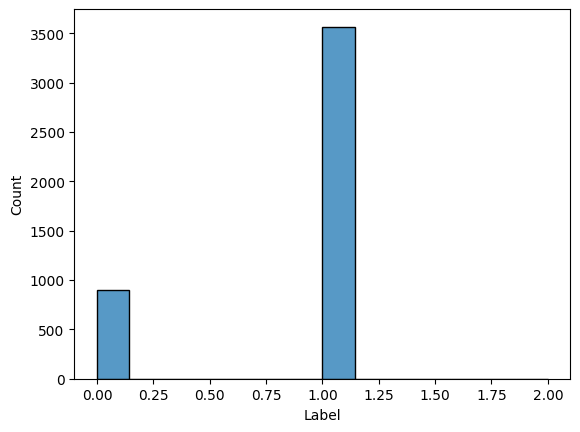

In [19]:
sns.histplot(data=modi, x='Label');

In [20]:
X, y = modi.drop('Label', axis=1), modi['Label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
print(X_train.shape)
print(y_train.shape)
print('='*60)
print(X_test.shape)
print(y_test.shape)

(3125, 241)
(3125,)
(1340, 241)
(1340,)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
clf1 = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 4]  
}
grid = GridSearchCV(clf1, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 20, 30, 40]})

In [26]:
clf1 = grid.best_estimator_
clf1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [27]:
feature_importances = clf1.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)




In [28]:
# Display the least important features
least_important_n = 10
print("\nLeast", least_important_n, "Important Features:")
print(feature_importance_df.tail(least_important_n))


Least 10 Important Features:
                    Feature  Importance
92            INJECT_EVENTS         0.0
96    INTERACT_ACROSS_USERS         0.0
97   INTERNAL_SYSTEM_WINDOW         0.0
99            JPUSH_MESSAGE         0.0
101       LOCATION_HARDWARE         0.0
103       MANAGE_APP_TOKENS         0.0
104        MANAGE_DOCUMENTS         0.0
105            MAPS_RECEIVE         0.0
107            MEDIA_BUTTON         0.0
120                    READ         0.0


In [29]:
y_pred1 = clf1.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
s1 = accuracy_score(y_test, y_pred1)
accuracy_score(y_test, y_pred1)

0.9917910447761195

In [30]:
print("Accuracy:", s1* 100)



Accuracy: 99.17910447761194


In [31]:
model_filename = "model.pkl"
joblib.dump(clf1, model_filename)

['model.pkl']

In [32]:
import joblib
import pandas as pd
from sklearn.impute import SimpleImputer  

loaded_model = joblib.load("model.pkl")
test_data = pd.read_csv("/kaggle/input/tunadromd-malware-detection-new/test.csv")
ids = test_data["ID"]

X_test = test_data.drop("ID", axis=1)

imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)

predictions = loaded_model.predict(X_test)

result_df = pd.DataFrame({
    'ID': ids,
    'Predicted': predictions }) 

result_df.to_csv("results.csv", index=False)

print(f"Predictions saved as predicted_results.csv")

Predictions saved as predicted_results.csv


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
